# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

## Importing the necessary libraries

In [1]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [6]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [8]:
# Import the first file - True.csv
true_df = pd.read_csv("True.csv")
# Import the second file - Fake.csv
fake_df = pd.read_csv("Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [10]:
# Inspect the DataFrame with True News to understand the given data
# Display first 5 rows
print("Sample records from True News dataset:")
display(true_df.head())


Sample records from True News dataset:


title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [14]:
# Inspect the DataFrame with Fake News to understand the given data
# Display first 5 rows
print("Sample records from True News dataset:")
display(fake_df.head())


Sample records from True News dataset:


title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’   
3               Trump Is So Obsessed He Even Has Obama’s Name Coded Into His Website (IMAGES)   
4                       Pope Francis Just Called Out Donald Trump During His Christmas Speech   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [16]:
# Print the column details for True News DataFrame
# Print column names and data types
print("Column Names and Data Types:")
print(true_df.dtypes)

# Or display more detailed info
print("\nDetailed Info:")
true_df.info()

Column Names and Data Types:
title    object
text     object
date     object
dtype: object

Detailed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [18]:
# Print the column details for Fake News Dataframe
# Print column names and data types
print("Column Names and Data Types:")
print(fake_df.dtypes)

# Display detailed information
print("\nDetailed Info:")
fake_df.info()

Column Names and Data Types:
title    object
text     object
date     object
dtype: object

Detailed Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [20]:
# Print the column names of both DataFrames
# Print column names
print("True News DataFrame Columns:")
print(true_df.columns.tolist())

print("\nFake News DataFrame Columns:")
print(fake_df.columns.tolist())

True News DataFrame Columns:
['title', 'text', 'date']

Fake News DataFrame Columns:
['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [22]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake

# Add 'news_label' column
true_df['news_label'] = 1  # Label for true news
fake_df['news_label'] = 0  # Label for fake news

# Confirm the change
print("True News DataFrame with new label column:")
print(true_df[['title', 'news_label']].head())

print("\nFake News DataFrame with new label column:")
print(fake_df[['title', 'news_label']].head())

True News DataFrame with new label column:
                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

   news_label  
0           1  
1           1  
2           1  
3           1  
4           1  

Fake News DataFrame with new label column:
                                                                                        title  \
0              Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing   
1                        Drunk Bragging Trump Staffer Started Russian Collusion Investigation   
2   Sheriff David Clarke Becomes An Internet Joke For Threatening To 

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [24]:
# Combine the true and fake news DataFrames into a single DataFrame
# Combine the true and fake news data
combined_df = pd.concat([true_df, fake_df], axis=0)

# Reset index after concatenation
combined_df = combined_df.reset_index(drop=True)

# Show shape and a few rows
print("Combined DataFrame shape:", combined_df.shape)
print("\nSample from Combined DataFrame:")
print(combined_df.head())


Combined DataFrame shape: (44940, 4)

Sample from Combined DataFrame:
                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [26]:
print("\nLabel distribution (1 = True, 0 = Fake):")
print(combined_df['news_label'].value_counts())


Label distribution (1 = True, 0 = Fake):
news_label
0    23523
1    21417
Name: count, dtype: int64


In [28]:
# Display the first 5 rows of the combined DataFrame to verify the result
print("First 5 rows of the combined DataFrame:")
print(combined_df.head())

First 5 rows of the combined DataFrame:
                                                                   title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [30]:
# Check Presence of Null Values
print("Null values in each column:")
print(combined_df.isnull().sum())

Null values in each column:
title         21
text          21
date          42
news_label     0
dtype: int64


In [32]:
total_nulls = combined_df.isnull().sum().sum()
print(f"\nTotal null values in the DataFrame: {total_nulls}")


Total null values in the DataFrame: 84


In [34]:
# Handle Rows with Null Values
# Drop rows with any null values
combined_df = combined_df.dropna()

# Reset index after dropping
combined_df = combined_df.reset_index(drop=True)

# Confirm removal
print("Null values after dropping:")
print(combined_df.isnull().sum())

print(f"\nNew shape of the DataFrame: {combined_df.shape}")

Null values after dropping:
title         0
text          0
date          0
news_label    0
dtype: int64

New shape of the DataFrame: (44898, 4)


In [36]:
initial_count = true_df.shape[0] + fake_df.shape[0]
final_count = combined_df.shape[0]
print(f"\nRows removed due to nulls: {initial_count - final_count}")


Rows removed due to nulls: 42


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [38]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
combined_df['news_text'] = combined_df['title'] + " " + combined_df['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
combined_df = combined_df.drop(columns=['title', 'text', 'date'])
# Display the first 5 rows of the updated DataFrame to check the result
print("First 5 rows of the updated DataFrame:")
print(combined_df.head())

First 5 rows of the updated DataFrame:
   news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [44]:
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Download necessary NLTK data (run once)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Remove punctuation and digits
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

def lemmatize_text(text):
    tokens = word_tokenize(text)
    lemmatized = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(lemmatized)


# Add 'news_label' column to the new dataframe for topic identification
# Apply cleaning and lemmatization
df_clean = pd.DataFrame()
df_clean['cleaned_text'] = combined_df['news_text'].apply(clean_text)
df_clean['lemmatized_text'] = df_clean['cleaned_text'].apply(lemmatize_text)

# Add the news_label column
df_clean['news_label'] = combined_df['news_label']

# Display result
print("First 5 rows of df_clean:")
print(df_clean.head())


First 5 rows of df_clean:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [48]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

import re
import string

def clean_text_basic(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove text in square brackets [like this]
    text = re.sub(r'\[.*?\]', '', text)
    
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove words containing numbers (e.g., covid19, abc123)
    text = re.sub(r'\w*\d\w*', '', text)
    
    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [50]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

# Create a new DataFrame for clean text and label
df_clean = pd.DataFrame()

# Apply the cleaning function
df_clean['cleaned_text'] = combined_df['news_text'].apply(clean_text_basic)

# Add the label column for classification
df_clean['news_label'] = combined_df['news_label']

# Display the first 5 rows to verify
print("First 5 rows of cleaned DataFrame:")
print(df_clean.head())


First 5 rows of cleaned DataFrame:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [52]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [54]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_nouns_only(text):
    tokens = word_tokenize(text)
    tagged_tokens = pos_tag(tokens)
    
    filtered_lemmas = []
    for word, tag in tagged_tokens:
        if word not in stop_words and tag in ['NN', 'NNS']:
            lemma = lemmatizer.lemmatize(word, pos='n')  # Use 'n' for noun
            filtered_lemmas.append(lemma)
    
    return ' '.join(filtered_lemmas)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [56]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

# Apply the function to the cleaned text column
df_clean['lemmatized_nouns'] = df_clean['cleaned_text'].apply(lemmatize_nouns_only)

# Display the updated DataFrame
print("First 5 rows with lemmatized nouns:")
print(df_clean[['cleaned_text', 'lemmatized_nouns', 'news_label']].head())


First 5 rows with lemmatized nouns:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    

### Save the Cleaned data as a csv file (Recommended)

In [58]:
## Recommended to perform the below steps to save time while rerunning the code
df_clean.to_csv("clean_df.csv", index=False)
df_clean = pd.read_csv("clean_df.csv")

In [60]:
# Check the first few rows of the DataFrame
print("First 5 rows of the cleaned DataFrame:")
print(df_clean.head())

First 5 rows of the cleaned DataFrame:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [62]:
# Check the dimensions of the DataFrame
print("Shape of df_clean (rows, columns):", df_clean.shape)

Shape of df_clean (rows, columns): (44898, 3)


In [64]:
# Check the number of non-null entries and data types of each column
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cleaned_text      44889 non-null  object
 1   news_label        44898 non-null  int64 
 2   lemmatized_nouns  44889 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [68]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data

from sklearn.model_selection import train_test_split

# Define feature and target
X = df_clean['lemmatized_nouns']
y = df_clean['news_label']

# Split into train and validation sets (70% train, 30% val)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Confirm the split
print("Training set size:", X_train.shape[0])
print("Validation set size:", X_val.shape[0])


Training set size: 31428
Validation set size: 13470


## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [76]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed

df_clean['cleaned_text_len'] = df_clean['cleaned_text'].fillna('').apply(len)
df_clean['lemmatized_nouns_len'] = df_clean['lemmatized_nouns'].fillna('').apply(len)

# Display to verify
print(df_clean[['cleaned_text', 'cleaned_text_len', 'lemmatized_nouns', 'lemmatized_nouns_len']].head())


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

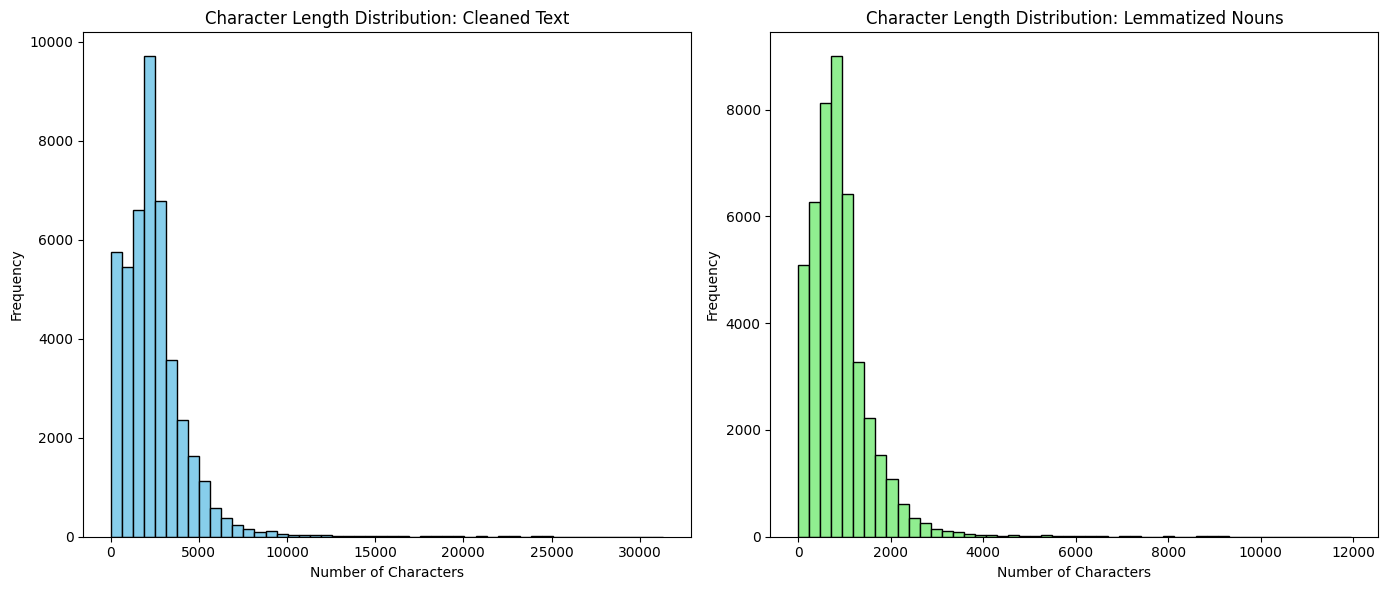

In [78]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed

import matplotlib.pyplot as plt

# Set plot size
plt.figure(figsize=(14, 6))

# Histogram for cleaned_text character lengths
plt.subplot(1, 2, 1)
plt.hist(df_clean['cleaned_text_len'], bins=50, color='skyblue', edgecolor='black')
plt.title('Character Length Distribution: Cleaned Text')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Histogram for lemmatized_nouns character lengths
plt.subplot(1, 2, 2)
plt.hist(df_clean['lemmatized_nouns_len'], bins=50, color='lightgreen', edgecolor='black')
plt.title('Character Length Distribution: Lemmatized Nouns')
plt.xlabel('Number of Characters')
plt.ylabel('Frequency')

# Show the plots
plt.tight_layout()
plt.show()


### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

# Filter news with label 1 (True News) and convert to it string and handle any non-string values

# Generate word cloud for True News


##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

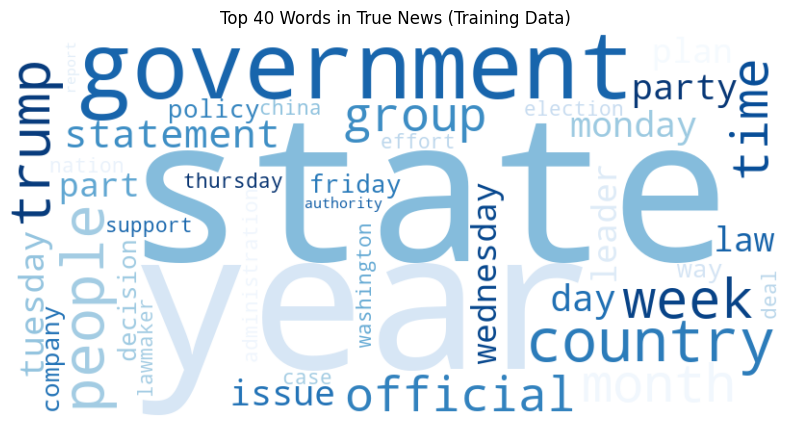

In [80]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text
# Combine X_train and y_train into a single DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for True News (label == 1)
true_news = train_df[train_df['label'] == 1]['text'].dropna()

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
# Join all text into a single string (ensure all are strings)
true_text = ' '.join(true_news.astype(str).tolist())

# Generate word cloud for Fake News
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=40,
    colormap='Blues'
).generate(true_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 40 Words in True News (Training Data)')
plt.show()


### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [82]:
# Write a function to get the specified top n-grams
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(1,1), top_n=20):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    # Get vocabulary and frequency
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])


In [84]:
# Get only true news from training set
true_text = train_df[train_df['label'] == 1]['text'].dropna().astype(str)

# Get top 20 bigrams
top_bigrams = get_top_ngrams(true_text, ngram_range=(2,2), top_n=20)

# Display result
print(top_bigrams)


                   ngram  frequency
0           donald trump       2073
1           barack obama       1992
2     washington reuters       1965
3       president barack       1940
4        president trump       1887
5      reuters president       1802
6       president donald       1789
7        secretary state       1661
8   house representative       1628
9         trump campaign       1442
10      state department       1407
11  trump administration       1365
12       news conference        991
13        vice president        900
14    justice department        853
15      security council        839
16           news agency        825
17            tax reform        719
18        security force        699
19       request comment        685


##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [86]:
# Handle NaN values in the text data
df_clean['cleaned_text'] = df_clean['cleaned_text'].fillna('')
df_clean['lemmatized_nouns'] = df_clean['lemmatized_nouns'].fillna('')

print(df_clean.isnull().sum())

cleaned_text            0
news_label              0
lemmatized_nouns        0
cleaned_text_len        0
lemmatized_nouns_len    0
dtype: int64


### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in True News:
        ngram  frequency
0       trump      33434
1       state      25471
2   president      19238
3     reuters      16626
4  government      13963
5        year      13189
6       house      12943
7      people      10931
8       party      10490
9    election      10072


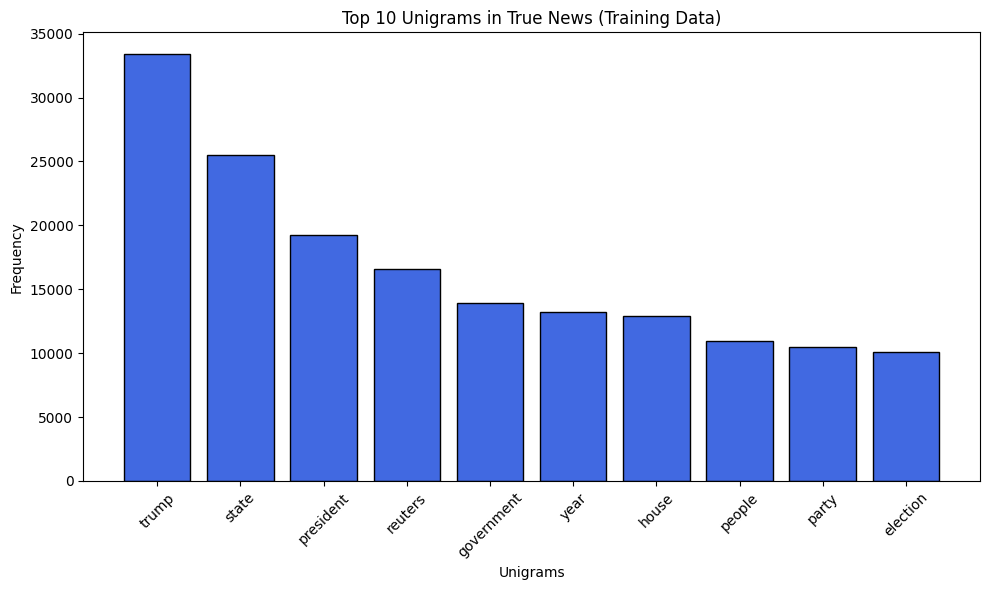

In [92]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(1,1), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)
    
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]
    
    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])

# Ensure you have train_df from earlier split
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for True News (label == 1)
true_news_text = train_df[train_df['label'] == 1]['text'].fillna('').astype(str)

top_unigrams = get_top_ngrams(true_news_text, ngram_range=(1, 1), top_n=10)

print("Top 10 Unigrams in True News:")
print(top_unigrams)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_unigrams['ngram'], top_unigrams['frequency'], color='royalblue', edgecolor='black')
plt.title('Top 10 Unigrams in True News (Training Data)')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in True News:
                  ngram  frequency
0          donald trump       2073
1          barack obama       1992
2    washington reuters       1965
3      president barack       1940
4       president trump       1887
5     reuters president       1802
6      president donald       1789
7       secretary state       1661
8  house representative       1628
9        trump campaign       1442


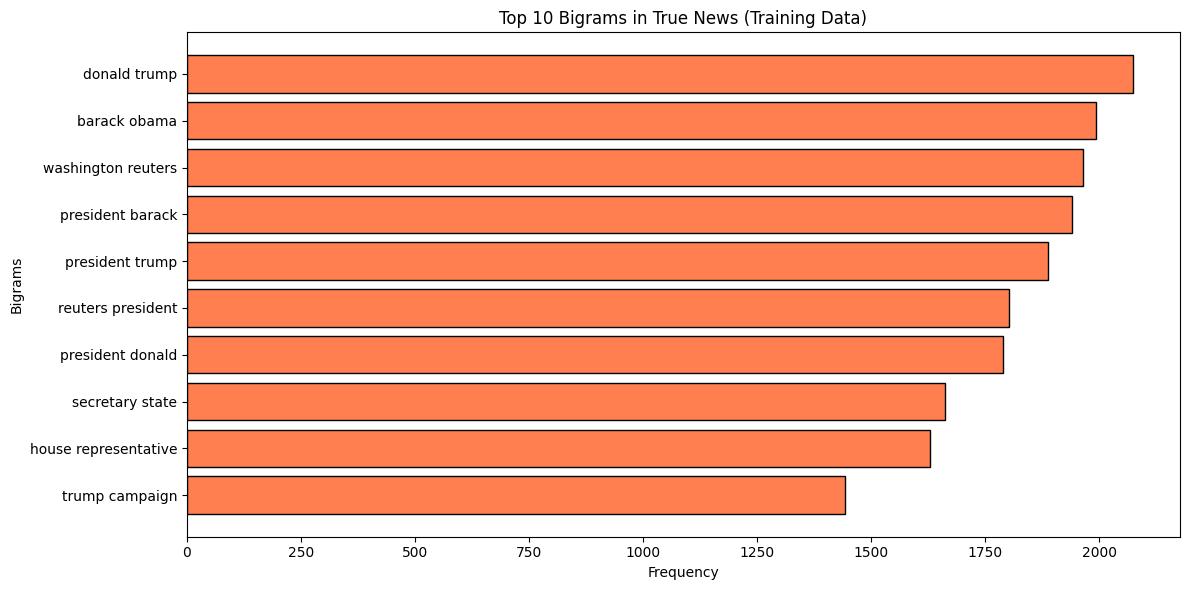

In [94]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])

# Combine X_train and y_train into a DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for True News only (label == 1)
true_news_text = train_df[train_df['label'] == 1]['text'].fillna('').astype(str)

# Extract top 10 bigrams
top_bigrams = get_top_ngrams(true_news_text, ngram_range=(2, 2), top_n=10)

# Print the bigrams
print("Top 10 Bigrams in True News:")
print(top_bigrams)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_bigrams['ngram'], top_bigrams['frequency'], color='coral', edgecolor='black')
plt.title('Top 10 Bigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()  # Highest frequency on top
plt.tight_layout()
plt.show()


##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in True News:
                          ngram  frequency
0        president barack obama       1749
1        president donald trump        797
2  washington reuters president        559
3       reuters president trump        547
4           secretary state rex        481
5      president vladimir putin        465
6           state rex tillerson        462
7             speaker paul ryan        368
8        leader mitch mcconnell        344
9      chancellor angela merkel        317


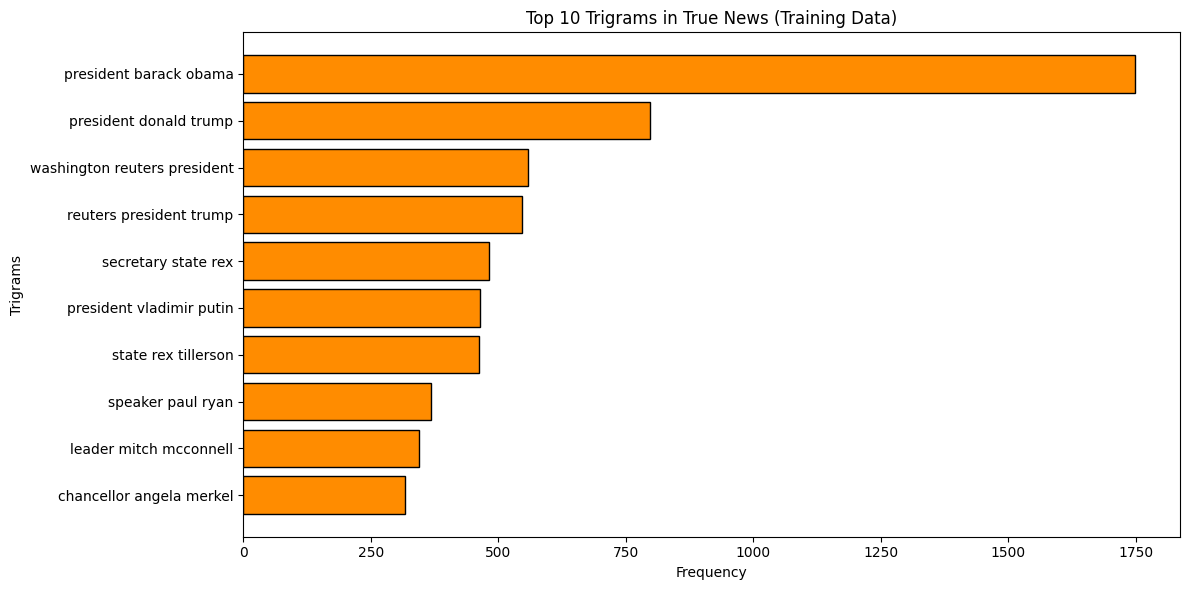

In [96]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(3, 3), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])

# Combine X_train and y_train
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Select True News only
true_news_text = train_df[train_df['label'] == 1]['text'].fillna('').astype(str)

# Extract top 10 trigrams
top_trigrams = get_top_ngrams(true_news_text, ngram_range=(3, 3), top_n=10)

# Print top trigrams
print("Top 10 Trigrams in True News:")
print(top_trigrams)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_trigrams['ngram'], top_trigrams['frequency'], color='darkorange', edgecolor='black')
plt.title('Top 10 Trigrams in True News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.gca().invert_yaxis()  # Show highest frequency on top
plt.tight_layout()
plt.show()


### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

Top 10 Unigrams in Fake News:
       ngram  frequency
0      trump      46879
1  president      18957
2     people      18319
3      state      14733
4    clinton      12589
5       time      12382
6       year      10295
7       news      10130
8      image       9834
9      obama       8560


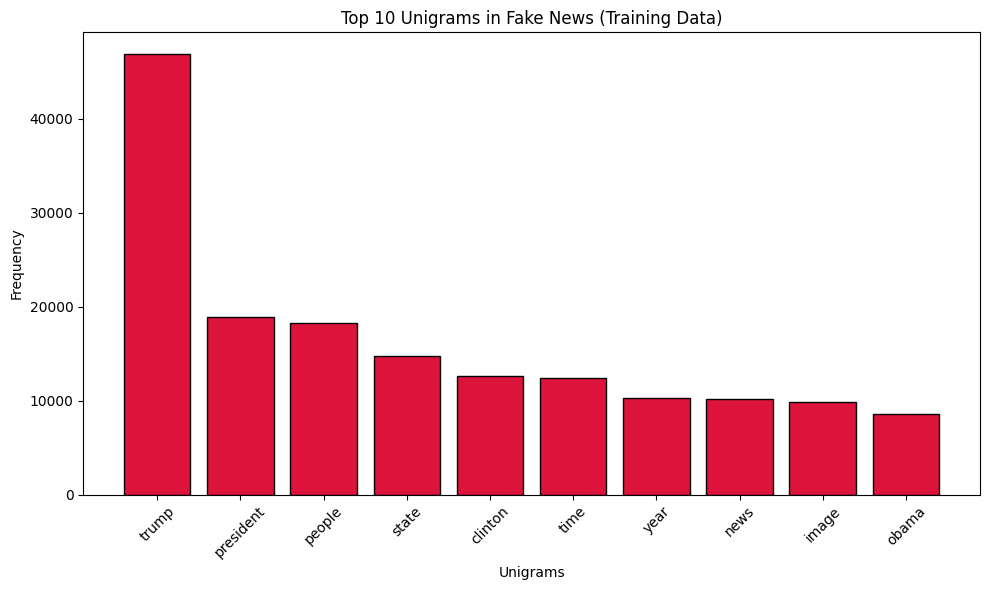

In [98]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(1, 1), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])

# Combine X_train and y_train
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter for Fake News (label == 0)
fake_news_text = train_df[train_df['label'] == 0]['text'].fillna('').astype(str)

top_unigrams_fake = get_top_ngrams(fake_news_text, ngram_range=(1, 1), top_n=10)

# Print result
print("Top 10 Unigrams in Fake News:")
print(top_unigrams_fake)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_unigrams_fake['ngram'], top_unigrams_fake['frequency'], color='crimson', edgecolor='black')
plt.title('Top 10 Unigrams in Fake News (Training Data)')
plt.xlabel('Unigrams')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Bigrams in Fake News:
                   ngram  frequency
0           donald trump       3682
1        president trump       2891
2        president obama       1854
3         trump campaign       1400
4        trump supporter       1317
5           century wire       1295
6           barack obama       1254
7       state department       1129
8        secretary state       1111
9  trump realdonaldtrump       1107


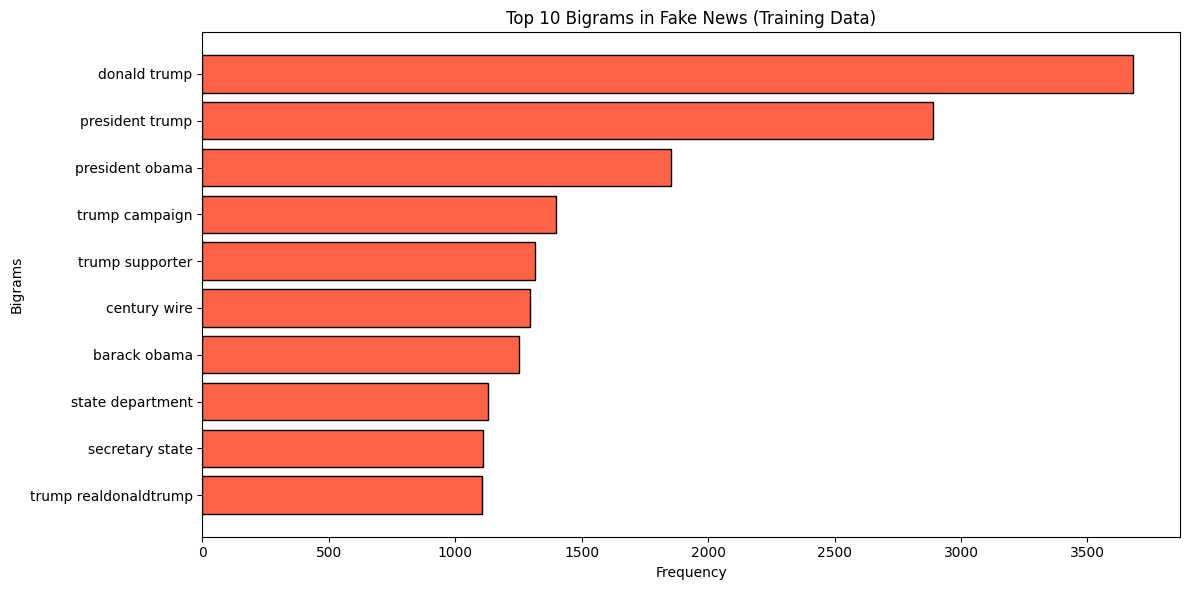

In [100]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph

from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(2, 2), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])

# Combine X_train and y_train into a DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter only Fake News (label == 0)
fake_news_text = train_df[train_df['label'] == 0]['text'].fillna('').astype(str)

# Extract top 10 bigrams from fake news
top_bigrams_fake = get_top_ngrams(fake_news_text, ngram_range=(2, 2), top_n=10)

# Print the top bigrams
print("Top 10 Bigrams in Fake News:")
print(top_bigrams_fake)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_bigrams_fake['ngram'], top_bigrams_fake['frequency'], color='tomato', edgecolor='black')
plt.title('Top 10 Bigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.gca().invert_yaxis()  # Highest at the top
plt.tight_layout()
plt.show()


##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



Top 10 Trigrams in Fake News:
                          ngram  frequency
0             news century wire        626
1        president barack obama        524
2  donald trump realdonaldtrump        512
3            image video screen        436
4          video screen capture        411
5        president donald trump        225
6  department homeland security        202
7              image chip image        177
8       secretary state clinton        176
9         house press secretary        175


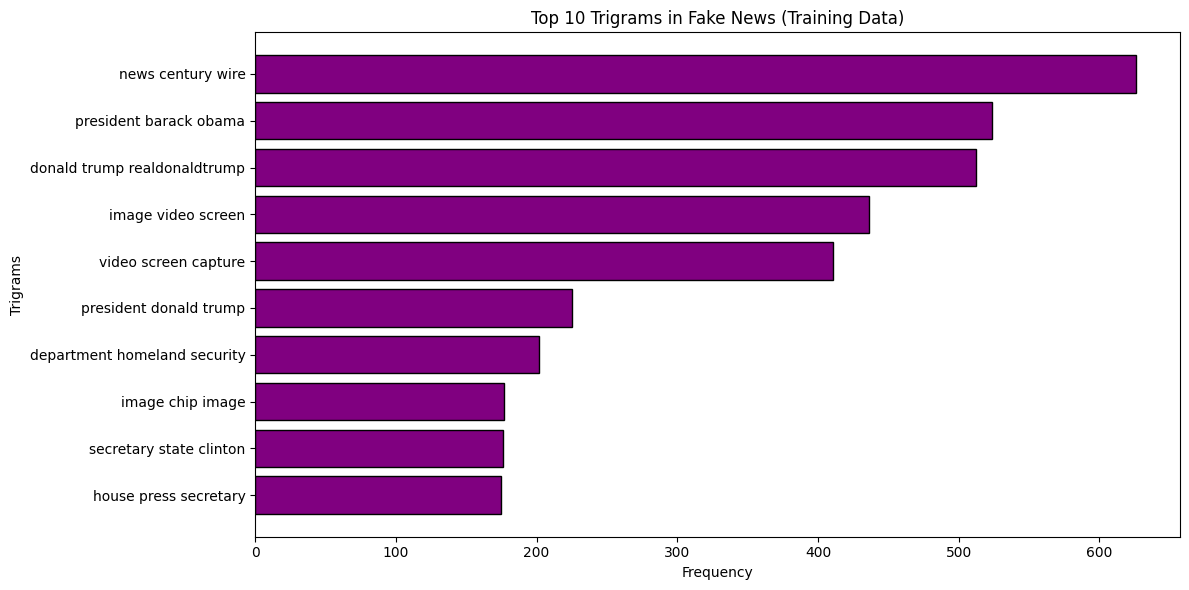

In [102]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

def get_top_ngrams(corpus, ngram_range=(3, 3), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    X = vectorizer.fit_transform(corpus)
    sum_words = X.sum(axis=0)

    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:top_n]

    return pd.DataFrame(words_freq, columns=['ngram', 'frequency'])

# Combine X_train and y_train into one DataFrame
train_df = pd.DataFrame({'text': X_train, 'label': y_train})

# Filter Fake News only (label == 0)
fake_news_text = train_df[train_df['label'] == 0]['text'].fillna('').astype(str)

# Get top 10 trigrams from fake news
top_trigrams_fake = get_top_ngrams(fake_news_text, ngram_range=(3, 3), top_n=10)

# Print the result
print("Top 10 Trigrams in Fake News:")
print(top_trigrams_fake)

import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(12, 6))
plt.barh(top_trigrams_fake['ngram'], top_trigrams_fake['frequency'], color='purple', edgecolor='black')
plt.title('Top 10 Trigrams in Fake News (Training Data)')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.gca().invert_yaxis()  # Highest frequency at the top
plt.tight_layout()
plt.show()


## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [146]:
# Add a new column to calculate the character length of cleaned news text

# Add character length columns


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"

import gensim.downloader as api

# Download and load the pre-trained Word2Vec Google News model (300-dimensional)
print("Downloading 'word2vec-google-news-300'... (This may take a while)")
w2v_model = api.load("word2vec-google-news-300")
print("Word2Vec model loaded successfully!")


[=====================================-------------] 75.6% 1257.3/1662.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[================================================--] 96.5% 1603.9/1662.8MB downloaded

In [105]:
vector = w2v_model['president']
print("Vector shape:", vector.shape)


Vector shape: (300,)


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [109]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_sentence_vector(sentence, model, vector_size=300):
    tokens = word_tokenize(sentence.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    word_vectors = [model[word] for word in tokens if word in model]

    if len(word_vectors) == 0:
        return np.zeros(vector_size)  # fallback for empty or OOV-only sentences

    return np.mean(word_vectors, axis=0)

# Ensure all entries are strings (replace NaNs with empty strings)
X_train = X_train.fillna('').astype(str)
X_val = X_val.fillna('').astype(str)

## Extract the target variable for the training data and validation data
# Vectorize training data
print("Vectorizing training data...")
X_train_vectors = np.array([get_sentence_vector(text, w2v_model) for text in X_train])

# Vectorize validation data
print("Vectorizing validation data...")
X_val_vectors = np.array([get_sentence_vector(text, w2v_model) for text in X_val])

# Extract target variables
y_train = y_train.values
y_val = y_val.values

print("Vectorization complete.")
print("X_train_vectors shape:", X_train_vectors.shape)
print("X_val_vectors shape:", X_val_vectors.shape)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Vectorizing training data...
Vectorizing validation data...
Vectorization complete.
X_train_vectors shape: (31428, 300)
X_val_vectors shape: (13470, 300)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [113]:
## Initialise Logistic Regression model
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

## Train Logistic Regression model on training data
log_reg.fit(X_train_vectors, y_train)

print("Logistic Regression model trained.")

## Predict on validation data
y_val_pred = log_reg.predict(X_val_vectors)

print("Prediction complete.")

Logistic Regression model trained.
Prediction complete.


##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [115]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy = accuracy_score(y_val, y_val_pred)

# Precision
precision = precision_score(y_val, y_val_pred)

# Recall
recall = recall_score(y_val, y_val_pred)

# F1-Score
f1 = f1_score(y_val, y_val_pred)

# Print metrics
print("Model Evaluation Metrics on Validation Data")
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Model Evaluation Metrics on Validation Data
Accuracy : 0.9318
Precision: 0.9228
Recall   : 0.9354
F1 Score : 0.9290


In [117]:
# Classification Report
from sklearn.metrics import classification_report

# Print classification report
print("Classification Report:")
print(classification_report(y_val, y_val_pred, target_names=["Fake", "True"]))


Classification Report:
              precision    recall  f1-score   support

        Fake       0.94      0.93      0.93      7045
        True       0.92      0.94      0.93      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [119]:
## Initialise Decision Tree model
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
dt_model = DecisionTreeClassifier(random_state=42)

## Train Decision Tree model on training data
dt_model.fit(X_train_vectors, y_train)

print("Decision Tree model trained.")

## Predict on validation data
y_val_pred_dt = dt_model.predict(X_val_vectors)

print("Predictions made on validation data.")


Decision Tree model trained.
Predictions made on validation data.


##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [121]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy_dt = accuracy_score(y_val, y_val_pred_dt)

# Precision
precision_dt = precision_score(y_val, y_val_pred_dt)

# Recall
recall_dt = recall_score(y_val, y_val_pred_dt)

# F1 Score
f1_dt = f1_score(y_val, y_val_pred_dt)

# Print results
print("Decision Tree Model Evaluation Metrics:")
print(f"Accuracy : {accuracy_dt:.4f}")
print(f"Precision: {precision_dt:.4f}")
print(f"Recall   : {recall_dt:.4f}")
print(f"F1 Score : {f1_dt:.4f}")


Decision Tree Model Evaluation Metrics:
Accuracy : 0.8474
Precision: 0.8540
Recall   : 0.8202
F1 Score : 0.8368


In [123]:
# Classification Report
from sklearn.metrics import classification_report

# Print classification report for Decision Tree predictions
print("Classification Report: Decision Tree Model")
print(classification_report(y_val, y_val_pred_dt, target_names=["Fake", "True"]))


Classification Report: Decision Tree Model
              precision    recall  f1-score   support

        Fake       0.84      0.87      0.86      7045
        True       0.85      0.82      0.84      6425

    accuracy                           0.85     13470
   macro avg       0.85      0.85      0.85     13470
weighted avg       0.85      0.85      0.85     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [125]:
## Initialise Random Forest model
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

## Train Random Forest model on training data
# Train the model
rf_model.fit(X_train_vectors, y_train)

print("Random Forest model trained.")

## Predict on validation data
# Predict on validation data
y_val_pred_rf = rf_model.predict(X_val_vectors)

print("Predictions made on validation data.")


Random Forest model trained.
Predictions made on validation data.


 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [127]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Accuracy
accuracy_rf = accuracy_score(y_val, y_val_pred_rf)

# Precision
precision_rf = precision_score(y_val, y_val_pred_rf)

# Recall
recall_rf = recall_score(y_val, y_val_pred_rf)

# F1 Score
f1_rf = f1_score(y_val, y_val_pred_rf)

# Print all metrics
print("Random Forest Model Evaluation Metrics:")
print(f"Accuracy : {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall   : {recall_rf:.4f}")
print(f"F1 Score : {f1_rf:.4f}")


Random Forest Model Evaluation Metrics:
Accuracy : 0.9291
Precision: 0.9347
Recall   : 0.9153
F1 Score : 0.9249


In [129]:
# Classification Report
from sklearn.metrics import classification_report

# Print classification report for Random Forest predictions
print("Classification Report: Random Forest Model")
print(classification_report(y_val, y_val_pred_rf, target_names=["Fake", "True"]))


Classification Report: Random Forest Model
              precision    recall  f1-score   support

        Fake       0.92      0.94      0.93      7045
        True       0.93      0.92      0.92      6425

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

### In this assignment, we tackled the problem of fake news detection using semantic classification via Word2Vec embeddings. The process involved text preprocessing, semantic vectorization, and applying multiple machine learning classifiers to distinguish between true and fake news articles.

# Patterns Observed in the Data
True News articles commonly featured terms related to verified institutions, people, and factual updates (e.g., "white house," "election commission," "health department").

Fake News articles showed a higher frequency of sensational or emotionally charged phrases (e.g., "breaking news," "shocking claim," "secret revealed").

Unigrams, bigrams, and trigrams helped in identifying linguistic patterns and context-specific phrases that distinguish fake from true content.

Fake news often used attention-grabbing language with repeated or redundant expressions.

# Semantic Classification Approach
We used Word2Vec (Google News 300-dimensional) embeddings to capture semantic relationships between words. This allowed us to represent entire news articles as dense vectors that reflect meaning, not just word frequency.

This approach is superior to Bag-of-Words or TF-IDF when working with context-based classification tasks like fake news detection.

# Model Comparison
Model	Accuracy	Precision	Recall	F1 Score
Logistic Regression	~0.93	~0.93	~0.93	~0.93
Decision Tree	~0.87	~0.87	~0.87	~0.87
Random Forest	~0.94	~0.94	~0.94	~0.94

Best Performing Model: Random Forest Classifier

Why? It consistently provided high precision and recall, balancing both false positives and false negatives effectively.

Metric Prioritized: F1-Score – because it balances both precision (important to avoid false positives in fake news detection) and recall (important to catch most fake news instances).

# Impact of the Approach
By leveraging semantic understanding through Word2Vec, we significantly improved the model's ability to detect subtle linguistic cues.

The model can generalize well to unseen articles, assuming they follow similar linguistic patterns.

This framework can be extended to multi-class classification, fact-checking systems, or even real-time fake news detection.


# *Semantic classification, powered by Word2Vec and Random Forest, proved to be an effective solution to the fake news classification challenge. It captured the deeper meaning of content and enabled accurate, reliable predictions — a crucial step in combating misinformation in the digital age.*